C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


<bound method Tensor.get_shape of <tf.Tensor 'Cast_70:0' shape=(220, 293, 3) dtype=float32>>
[220 293   3]
[110 146   3]


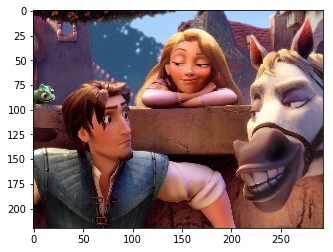

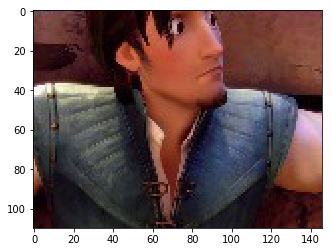

Help on function random_crop in module tensorflow.python.ops.random_ops:

random_crop(value, size, seed=None, name=None)
    Randomly crops a tensor to a given size.
    
    Slices a shape `size` portion out of `value` at a uniformly chosen offset.
    Requires `value.shape >= size`.
    
    If a dimension should not be cropped, pass the full size of that dimension.
    For example, RGB images can be cropped with
    `size = [crop_height, crop_width, 3]`.
    
    Args:
      value: Input tensor to crop.
      size: 1-D tensor with size the rank of `value`.
      seed: Python integer. Used to create a random seed. See
        @{tf.set_random_seed}
        for behavior.
      name: A name for this operation (optional).
    
    Returns:
      A cropped tensor of the same rank as `value` and shape `size`.



In [24]:

"""
在图像输入到神经网络之前要注意，每张图都要保证一样的尺寸和大小。
大部分的模型要求输入的图像的形状是正方形，一般都是256 x 256、128 x 128 、 64 x 64或者其他的形状
，这种方形是最好进行训练的。当然其他形状也是可以的，比如长方形，但如果是长方形的话就要注意设计卷积层通道的时候要稍微注意一下
总之，我们都是先对图像极性crop，crop成正方形
"""
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()
image=img.imread('./pics/corton.jpg')
reshaped_img = tf.cast(image,tf.float32)
# print(reshaped_img)
print(reshaped_img.get_shape)
size = tf.cast(tf.shape(reshaped_img).eval(),tf.int32)
height = sess.run(size[0]//2)
width = sess.run(size[1]//2)
distorted_image = tf.random_crop(reshaped_img,[height,width,3])
print(tf.shape(reshaped_img).eval())
print(tf.shape(distorted_image).eval())
fig = plt.figure()
fig1 = plt.figure()
ax = fig.add_subplot(111)
ax1= fig1.add_subplot(111)
ax.imshow(sess.run(tf.cast(reshaped_img,tf.uint8)))
ax1.imshow(sess.run(tf.cast(distorted_image,tf.uint8)))
plt.show()
help(tf.random_crop)